In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Plotting path

In [2]:
### x = [x, y, r, theta]
def f(x): return np.array([x[2]*x[1]**2,
                          -2/x[2]*x[0]*x[1],
                          x[0],
                          x[1]])

In [3]:
def var_search (x0a,r1,r2):
    
    x0b = np.zeros(4)
    
    x0b[0] = x0a[0]
    x0b[1] = x0a[1]
    x0b[2] = np.linalg.norm(r1, ord=2)
    x0b[3] = np.arctan(r1[1]/r1[0])

    t = np.linspace(0,x0a[2],1000)

    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0b
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    u = x[2,-1]*np.cos(x[3,-1])
    v = x[2,-1]*np.sin(x[3,-1])
    rf = np.array([u,v])

    return np.linalg.norm(r2-rf, ord=2)

Input points below.

In [4]:
r1 = np.array([1,1])
r2 = np.array([2,3])

x0 = np.zeros(3)

x0[0] = 0
x0[1] = 0
x0[2] = 1

rez = sp.optimize.minimize(var_search, x0, args=(r1,r2), method='Nelder-Mead', bounds=[(-np.linalg.norm(r1-r2),np.linalg.norm(r1-r2)),(-np.pi,np.pi),(0,1)])


In [5]:
def RK4 (f, x0, t):
    
    N = t.size
    x = np.zeros((x0.size,N))
    
    x[:,0] = x0[:]
    
    k = np.zeros((x0.size,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    return x

In [6]:
x0c = np.array([rez.x[0], rez.x[1], np.linalg.norm(r1, ord=2), np.arctan(r1[1]/r1[0])])
t = np.linspace(0,rez.x[2],1000)
x = RK4(f,x0c,t)

In [7]:
u = x[2]*np.cos(x[3])
v = x[2]*np.sin(x[3])

In [8]:
print('Distant point:          [{0:0.3f}, {1:0.3f}]'.format(*r2))
print('Final calculated point: [{0:0.3f}, {1:0.3f}]'.format(u[-1],v[-1]))


Distant point:          [2.000, 3.000]
Final calculated point: [2.081, 3.081]


Text(0.5, 1.0, 'Newtonian orbit calculated analytically')

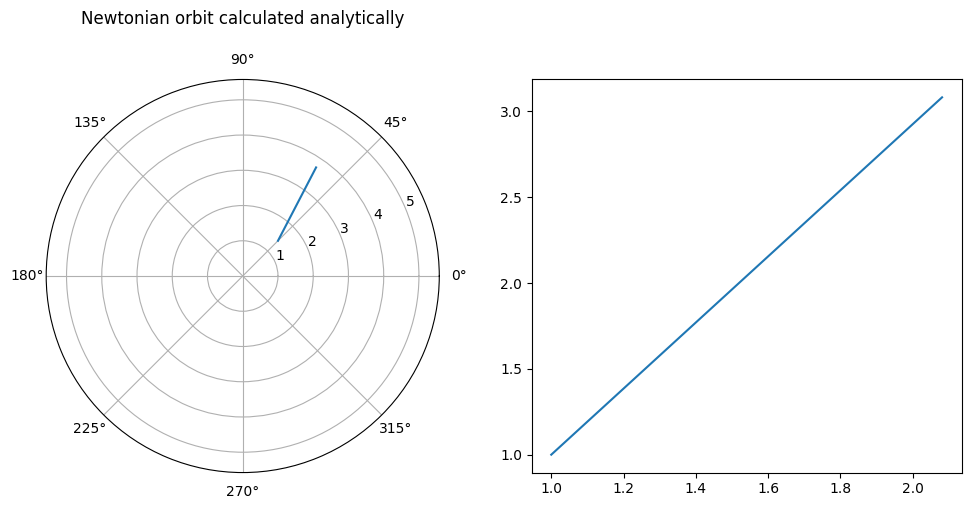

In [9]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1,projection='polar')
ax1.plot(x[3], x[2])
ax1.set_rmax(1.5*max(x[2]))
ax1.set_title("Newtonian orbit calculated analytically", pad=40)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(u,v)

plt.tight_layout()
plt.show()

# Parallel transport

In [22]:
### x = [dr, dtheta, r, theta], t = s

def g(y,x): ### y = [A0, A1]
    return np.array([x[2]*y[1]*x[1],
                     -(y[0]*x[1]+y[1]*x[0])/x[2]])

A0 = np.array([1,4])
A0 = A0/np.linalg.norm(A0,ord=2)
A0 = np.array([1, np.arctan(A0[0]/A0[1])])


N = t.size
y = np.zeros((A0.size,N))

y[:,0] = A0[:]

k = np.zeros((A0.size,4))
h = t[1]-t[0]

for i in range(1, t.size):
    
    k[:,0] = g(y[:,i-1], x[:,i])
    
    k[:,1] = g(y[:,i-1] + h/2*k[:,0], x[:,i])

    k[:,2] = g(y[:,i-1] + h/2*k[:,1], x[:,i])

    k[:,3] = g(y[:,i-1] + h*k[:,2], x[:,i])

    y[:,i] = y[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

Text(0.5, 1.0, 'Newtonian orbit calculated analytically')

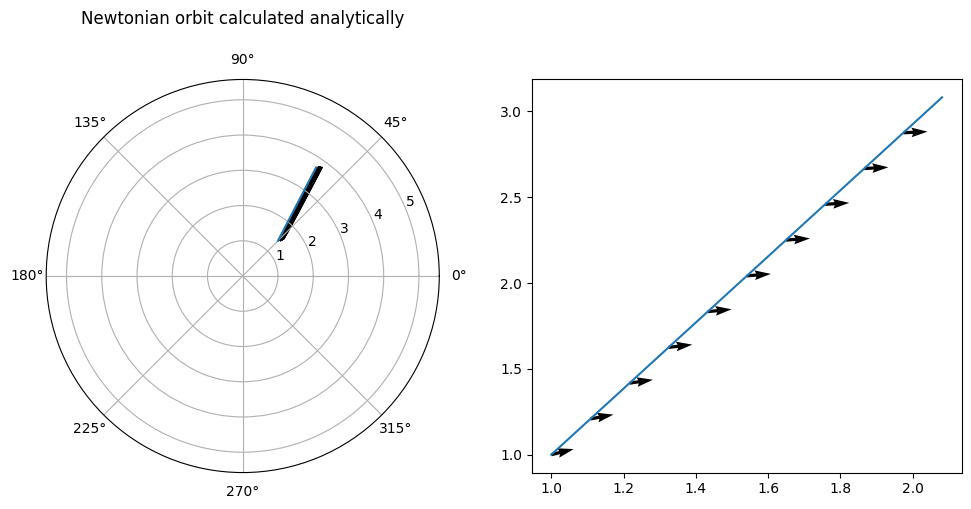

In [23]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1,projection='polar')
ax1.plot(x[3], x[2])
ax1.quiver(x[3], x[2], y[0]*np.cos(y[1]), y[0]*np.sin(y[1]))
ax1.set_rmax(1.5*max(x[2]))
ax1.set_title("Newtonian orbit calculated analytically", pad=40)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(u,v)
B = np.array([[u[0:-1:100]],[v[0:-1:100]],[(y[0]*np.cos(y[1]))[0:-1:100]],[(y[0]*np.sin(y[1]))[0:-1:100]]])
ax2.quiver(*B)


plt.tight_layout()
plt.show()

In [24]:
B

array([[[1.        , 1.10822578, 1.21645156, 1.32467733, 1.43290311,
         1.54112889, 1.64935467, 1.75758045, 1.86580623, 1.974032  ]],

       [[1.        , 1.20831853, 1.41663706, 1.6249556 , 1.83327413,
         2.04159266, 2.24991119, 2.45822972, 2.66654826, 2.87486679]],

       [[0.9701425 , 0.99673899, 1.01270898, 1.02299186, 1.02999326,
         1.03497933, 1.03866214, 1.04146521, 1.04365269, 1.04539611]],

       [[0.24253563, 0.18638492, 0.14738965, 0.11943938, 0.09880806,
         0.08317812, 0.07106605, 0.06149368, 0.05379771, 0.0475168 ]]])